# FFT
1. numpy fft package
    > fft Fast DFT <br>
    > ifft Inverse Fast DFT

In [123]:
import numpy as np
import math
import warnings
from matplotlib import pyplot as plt
from collections import Counter


# load example signal
t = np.arange(0, 1, 0.01)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t) + np.random.randn(len(t))

In [9]:
# FFT calculation
fft_result = np.fft.fft(signal)
fft_result.shape

(100,)

In [111]:
# gain frequency information
sampling_rate = 100  # 采样率
frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)

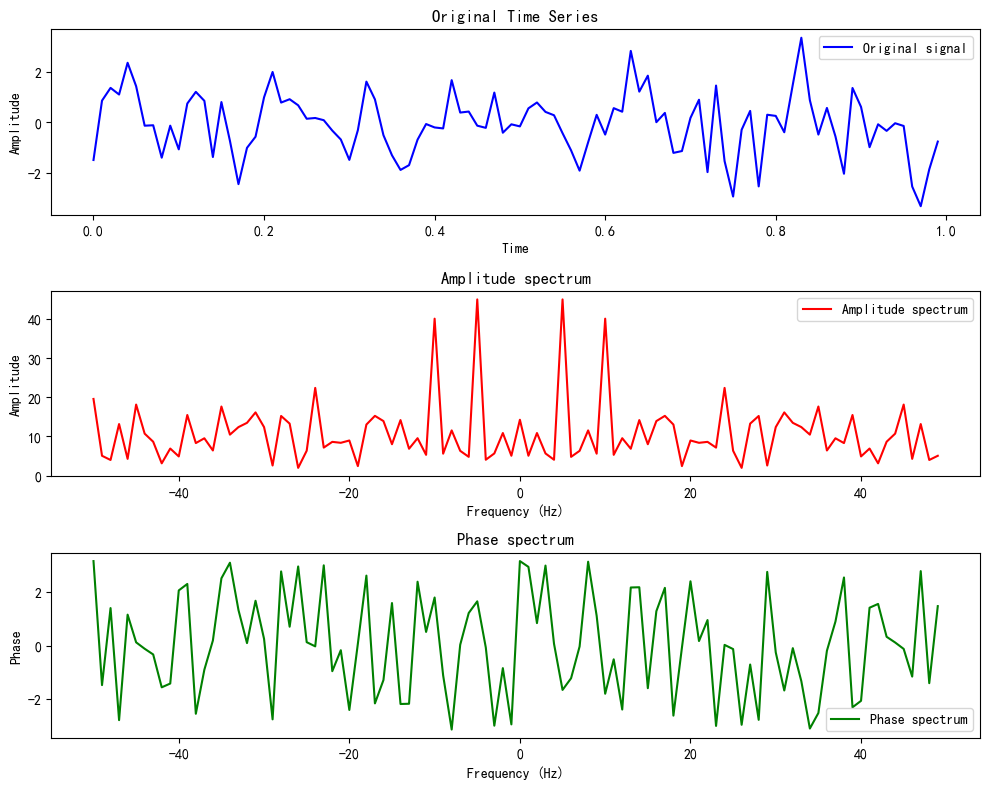

In [112]:
%matplotlib inline

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.15)

sub_fig1 = ax[0]
sub_fig2 = ax[1]
sub_fig3 = ax[2]

sub_fig1.plot(t, signal, 'b', label='Original signal')
sub_fig1.set_title("Original Time Series")
sub_fig1.set_xlabel('Time')
sub_fig1.set_ylabel('Amplitude')
sub_fig1.legend()

sub_fig2.plot(frequencies[frequencies.argsort()], np.abs(fft_result[frequencies.argsort()]), 
            'r', label='Amplitude spectrum')
sub_fig2.set_title("Amplitude spectrum")
sub_fig2.set_xlabel('Frequency (Hz)')
sub_fig2.set_ylabel('Amplitude')
sub_fig2.legend()

sub_fig3.plot(frequencies[frequencies.argsort()], np.angle(fft_result[frequencies.argsort()]), 
            'g', label='Phase spectrum')
sub_fig3.set_title("Phase spectrum")
sub_fig3.set_xlabel('Frequency (Hz)')
sub_fig3.set_ylabel('Phase')
sub_fig3.legend()

plt.tight_layout()
plt.show()

# PCA and Restore
1. find top 50% sampling points
2. do inverse fft, compare feature selection restoration effect

In [114]:
# calculate power ratio of each sampling points
power_spec = []
power_ttl = 0
for i in fft_result:
    power_ttl = power_ttl + np.power(np.abs(i),2)
for i in fft_result:
    ps = np.power(np.abs(i),2)
    power_spec.append(ps/power_ttl)
power_spec = np.array(power_spec, dtype=np.float64)
power_spec_cumsum = np.cumsum(power_spec)

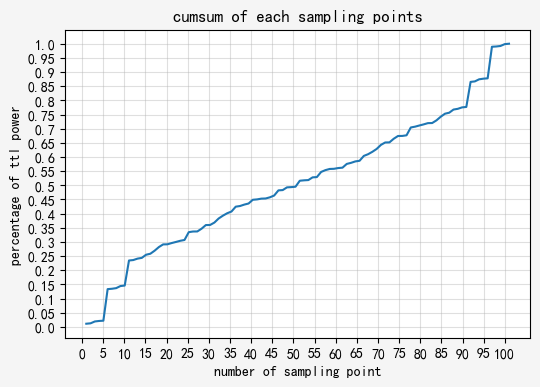

In [117]:
# draw power ratio graph
%matplotlib inline

plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

fig,ax = plt.subplots(1,1,figsize=(6,4),
                    facecolor='whitesmoke',
                    edgecolor='gray')
ax.plot(np.linspace(1,101,100),power_spec_cumsum)
ax.set_title("cumsum of each sampling points")
ax.set_yticks(np.arange(0,1.05,0.05))
ax.set_yticklabels(labels=np.round(np.arange(0,1.05,0.05),2))
ax.set_xticks(np.arange(0,105,5))
ax.set_xticklabels(labels=np.round(np.arange(0,105,5),2))
ax.set_xlabel("number of sampling point")
ax.set_ylabel("percentage of ttl power")
ax.grid(alpha=0.4)

In [127]:
# partially ifft
power_spec_ind = power_spec.argsort()[:50]
power_spce_str = []
fft_result_slice = fft_result[power_spec_ind]
fft_pitime = np.fft.ifft(fft_result_slice,n=100)

In [128]:
# fully ifft
fft_fitime = np.fft.ifft(fft_result)

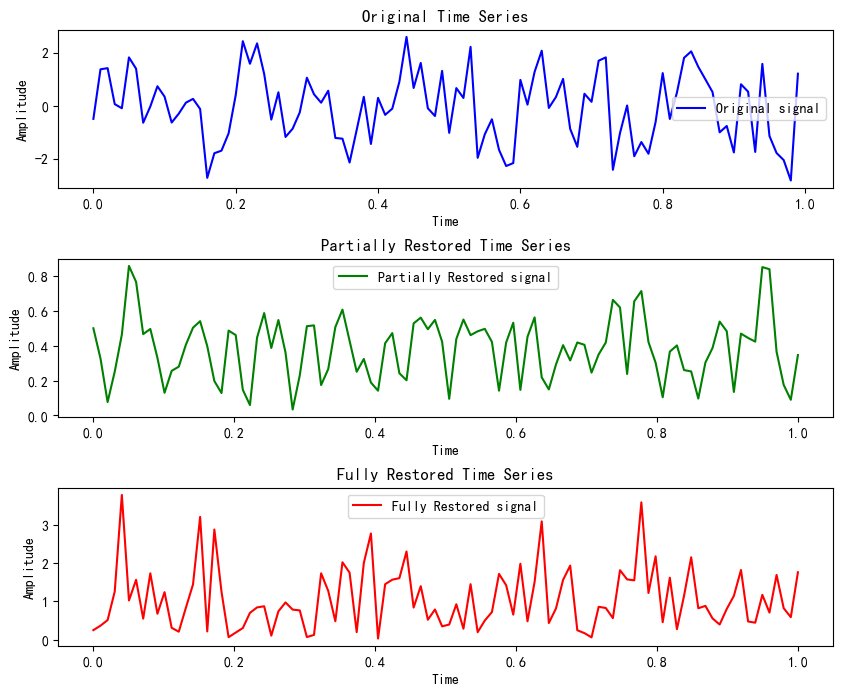

In [133]:
%matplotlib inline
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.45)

sub_fig1 = ax[0]
sub_fig2 = ax[1]
sub_fig3 = ax[2]

sub_fig1.plot(t, signal, 'b', label='Original signal')
sub_fig1.set_title("Original Time Series")
sub_fig1.set_xlabel('Time')
sub_fig1.set_ylabel('Amplitude')
sub_fig1.legend(loc="best")

sub_fig2.plot(np.linspace(0,1.0,100), np.abs(fft_pitime), 'g', label='Partially Restored signal')
sub_fig2.set_title("Partially Restored Time Series")
sub_fig2.set_xlabel('Time')
sub_fig2.set_ylabel('Amplitude')
sub_fig2.legend(loc="best")

sub_fig3.plot(np.linspace(0,1.0,100), np.abs(fft_fitime), 'r', label='Fully Restored signal')
sub_fig3.set_title("Fully Restored Time Series")
sub_fig3.set_xlabel('Time')
sub_fig3.set_ylabel('Amplitude')
sub_fig3.legend(loc="best")

plt.show()

# Others
1. numpy could handle complex number 
    > real will return real part of certain complex number <br>
    > imag will return imaginary part of certain complex number <br>
2. numpy abs() function will calculate norm of complex number

In [137]:
print("original complex number:")
print(fft_result[1])
print("------------------------")
print("norm of complex number using np.abs():")
print(np.abs(fft_result[1]))
print("------------------------")
print("get real and imaginary part of one complex number:")
print("real part:", fft_result[1].real, "\nimaginary part:", fft_result[1].imag)

original complex number:
(-4.9745931776365335+1.0860014237498428j)
------------------------
norm of complex number using np.abs():
5.0917557262082624
------------------------
get real and imaginary part of one complex number:
real part: -4.9745931776365335 
imaginary part: 1.0860014237498428
